In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [93]:
df=pd.read_csv("/kaggle/input/smoking-driking-dataset-ver01csv/smoking_driking_dataset_Ver01.csv")
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [94]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

In [95]:
for  col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = LabelEncoder().fit_transform(df[col])

In [96]:
df1=df.copy()

df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [97]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DRK_YN',axis=1), df[['DRK_YN']], random_state=1, train_size=.70)

In [98]:
xtrain.shape

(693942, 23)

In [99]:
xtrain.head(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
326864,0,40,155,45,66.0,1.0,1.0,1.0,1.0,119.0,...,55.0,108.0,77.0,13.0,1.0,1.0,22.0,11.0,9.0,1.0
771436,1,45,175,80,93.0,1.2,1.2,1.0,1.0,126.0,...,39.0,85.0,201.0,16.3,1.0,0.7,21.0,31.0,58.0,3.0
132119,0,55,160,50,68.0,1.5,1.2,1.0,1.0,115.0,...,52.0,161.0,188.0,13.2,1.0,0.6,24.0,19.0,19.0,3.0


In [100]:
xtest.shape

(297404, 23)

In [101]:
ytest.shape

(297404, 1)

In [102]:
ytest.head(3)

,DRK_YN
921688,1
56603,0
434962,0


In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [104]:
dt.fit(xtrain, ytrain) 

DecisionTreeClassifier()

In [105]:
pred = dt.predict(xtrain) #training result
pred

array([0, 1, 1, ..., 1, 0, 1])

In [106]:
ytrain.head(3)

,DRK_YN
326864,0
771436,1
132119,1


In [107]:
#ytrain['Predicted_result'] = pred

In [108]:
ytrain.head(3)

,DRK_YN
326864,0
771436,1
132119,1


# Training Score

In [109]:
dt.score(xtrain, ytrain['DRK_YN'])

1.0

# Testing Score

In [110]:
xtest.head(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
921688,0,50,155,60,82.0,0.7,0.5,1.0,1.0,130.0,...,80.0,95.0,193.0,14.0,1.0,0.7,30.0,26.0,35.0,1.0
56603,0,55,155,50,73.2,1.0,0.8,1.0,1.0,115.0,...,66.0,132.0,39.0,12.9,1.0,0.6,25.0,18.0,14.0,1.0
434962,0,60,160,60,78.0,0.6,0.8,1.0,1.0,97.0,...,67.0,90.0,57.0,13.3,1.0,0.7,21.0,16.0,11.0,1.0


In [111]:
pred2 = dt.predict(xtest)
pred2

array([1, 1, 0, ..., 0, 0, 1])

In [112]:
dt.score(xtest, ytest) #accuracy

0.6464506193595244

In [113]:
ytest

,DRK_YN
921688,1
56603,0
434962,0
742617,1
604547,1
...,...
139728,1
495807,0
119318,0
342705,1


In [114]:
ytest.head()

,DRK_YN
921688,1
56603,0
434962,0
742617,1
604547,1


In [115]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [116]:
ytest.head()

,DRK_YN
921688,1
56603,0
434962,0
742617,1
604547,1


In [117]:
xtest.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
921688,0,50,155,60,82.0,0.7,0.5,1.0,1.0,130.0,...,80.0,95.0,193.0,14.0,1.0,0.7,30.0,26.0,35.0,1.0
56603,0,55,155,50,73.2,1.0,0.8,1.0,1.0,115.0,...,66.0,132.0,39.0,12.9,1.0,0.6,25.0,18.0,14.0,1.0
434962,0,60,160,60,78.0,0.6,0.8,1.0,1.0,97.0,...,67.0,90.0,57.0,13.3,1.0,0.7,21.0,16.0,11.0,1.0
742617,1,35,175,80,94.0,1.2,1.2,1.0,1.0,121.0,...,49.0,128.0,258.0,15.3,1.0,0.6,19.0,27.0,31.0,3.0
604547,1,45,160,60,82.1,0.9,0.8,1.0,1.0,135.0,...,40.0,99.0,115.0,14.8,1.0,0.9,17.0,28.0,48.0,1.0


In [118]:
dt.predict(xtest)

array([1, 1, 0, ..., 0, 0, 1])

In [119]:
dt.score(xtest, ytest)

0.6464506193595244

In [120]:
accuracy_score(ytest, dt.predict(xtest))  

0.6464506193595244

In [121]:
confusion_matrix(ytest, dt.predict(xtest))

array([[96019, 52522],
       [52625, 96238]])

In [122]:
cm = confusion_matrix(ytest, dt.predict(xtest))
cm

array([[96019, 52522],
       [52625, 96238]])

<Axes: >

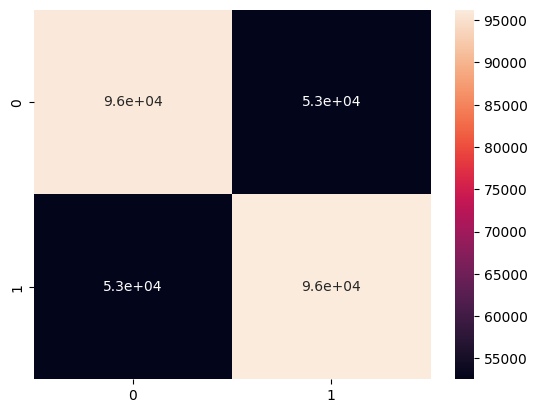

In [123]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [124]:
precision_score(ytest, dt.predict(xtest))

0.6469346598547997

In [125]:
recall_score(ytest, dt.predict(xtest))

0.6464870384178741

In [126]:
f1_score(ytest, dt.predict(xtest))

0.646710771680952

In [127]:
print(classification_report(ytest, dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65    148541
           1       0.65      0.65      0.65    148863

    accuracy                           0.65    297404
   macro avg       0.65      0.65      0.65    297404
weighted avg       0.65      0.65      0.65    297404



In [128]:

#import matplotlib.pyplot as plt
#from sklearn import datasets, metrics, model_selection, svm
#plot_roc_curve(dt, xtest, ytest)

In [129]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [130]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [131]:
!pip install scikit-plot
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

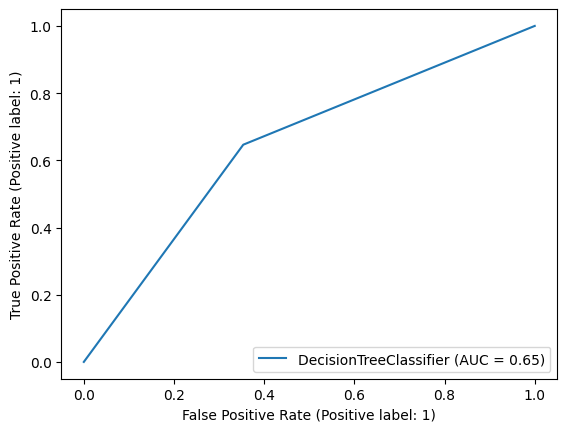

In [132]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(dt, xtest, ytest)

In [133]:
rfc_disp = RocCurveDisplay.from_estimator(dt, xtest, ytest, ax=svc_disp.ax_)

rfc_disp

# KNN_Classifier

In [134]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df1.drop('DRK_YN',axis=1), df1[['DRK_YN']], random_state=1, train_size=.90)

In [135]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

y = df1['DRK_YN']

x = df1.drop('DRK_YN', axis=1)


neigh.fit(xtrain1, ytrain1)





/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred1=neigh.predict(xtest1)

print(pred1)

In [ ]:
neigh.score(xtest1, ytest1)

In [ ]:
accuracy_score(ytest1, neigh.predict(xtest1))  

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
confusion_matrix(ytest1, neigh.predict(xtest1))

In [ ]:
cm = confusion_matrix(ytest1, neigh.predict(xtest1))
cm

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
precision_score(ytest1, neigh.predict(xtest1))

In [ ]:
recall_score(ytest1, neigh.predict(xtest1))

In [ ]:
f1_score(ytest1, neigh.predict(xtest1))

In [ ]:
print(classification_report(ytest1, neigh.predict(xtest1)))

In [ ]:
!pip install scikit-plot
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

In [ ]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(neigh, xtest1, ytest1)